## Classifier Performance: selecting for reobservation
#### Plot to show performance when selecting Lya QSOs for reobservation
In this notebook, we load the results from all of our classifiers on a DESI-like subset of the BOSS DR12Q Superset, and compare the results in the context of selecting high-z Lya QSOs for reobservation. We define different strategies for combining the classifiers' classifications, and assess which of these is preferable.

In [1]:
import copy
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from quasarnet.io import read_truth
from qn_analysis import plot, strategy, utils, variables

In [2]:
figsize = (12,8)
fontsize = 18

plt.rc('font', size=fontsize)

### Load the results from the different classifiers

In [21]:
common_specids = True
exptype = 'randexp'

## RR parameters
include_fits_rr = True

## QN parameters
n_detect = 1
c_th = 0.8
include_c_qn = True

## SQ parameters
p_min = 0.32
include_p_sq = True

In [4]:
f_truth = variables.OUTDIR+'/data/truth/truth_dr12q.fits'
truth = read_truth([f_truth])

In [5]:
data = {}

"""## Load the old RR data.
f_rr = variables.OUTDIR+'/results/rr_results/old/rr_sdr12q.fits'
data['RRold'] = utils.load_rr_data(f_rr)"""

## Load the RR data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_coadd.fits'
data['RR coadd'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

"""## Load the RRngp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_test_coadd_ngp.fits'
data['RRngp coadd'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)"""

"""## Load the RRngp archetypes data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_test_archetypes_coadd.fits'
data['RRngp archetypes coadd'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)"""

## Load the RRngp randexp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_randexp.fits'
data['RRngp randexp'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

"""## Load the RRngp archetypes randexp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_test_archetypes_randexp.fits'
data['RRngp archetypes randexp'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)"""

"""## Load the RRngp archetypes andmask randexp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_test_archetypes_andmask_randexp.fits'
data['RRngp archetypes andmask randexp'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)"""

## Load the RRngp bestexp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_bestexp.fits'
data['RRngp bestexp'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load the RR andmask data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_andmask_coadd.fits'
data['RR andmask coadd'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

"""## Load the RRngp andmask data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_test_andmask_coadd_ngp.fits'
data['RRngp andmask coadd'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)"""

## Load the RRngp andmask randexp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_andmask_randexp.fits'
data['RRngp andmask randexp'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load the RRngp andmask bestexp data.
f_rr = variables.OUTDIR+'/results/rr_results/rr_sdr12q_andmask_bestexp.fits'
data['RRngp andmask bestexp'] = utils.load_rr_data(f_rr,include_fits=include_fits_rr)

## Load BOSS pipeline data.
f_pipe = variables.OUTDIR+'/results/dr12pipe_results/dr12pipe_sdr12q.fits'
#f_pipe = '../dr14pipe_results/dr14pipe_sdr12q.fits'
data['PIPE'] = utils.load_rr_data(f_pipe,include_fits=include_fits_rr)

## Load the QN data.
singexp_mode = 'randexp'
f_qn = variables.OUTDIR+'/outputs/qn_outputs/main_setup/{m}/prop_0.1/model_indtrain_0_0/qnAll-train_0.1_{m}_0_0-test_{m}.fits'.format(m=singexp_mode)
data['QN randexp'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

"""## Load the old QN data.
f_qn = '/global/cfs/projectdirs/desi/users/jfarr/QuasarNET_paper_v0/results/qn_results/qn_performance_vs_snr/qn_modelsingexp_testsingexp.fits'
data['QNold'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)"""

## Load the QN data.
singexp_mode = 'bestexp'
f_qn = variables.OUTDIR+'/outputs/qn_outputs/main_setup/{m}/prop_0.1/model_indtrain_0_0/qnAll-train_0.1_{m}_0_0-test_{m}.fits'.format(m=singexp_mode)
data['QN bestexp'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = variables.OUTDIR+'/outputs/qn_outputs/main_setup/coadd/prop_0.1/model_indtrain_0_0/qnAll-train_0.1_coadd_0_0-test_coadd.fits'
data['QN coadd'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the SQ data.
# TODO: Need results for SQUEzE on single exposure data.
f_sq = variables.OUTDIR+'/results/sq_results/sq_sdr12q.fits'
data['SQ coadd'] = utils.load_sq_data(f_sq,p_min=p_min,include_p=include_p_sq)

In [6]:
for k in data.keys():
    print(k,len(data[k]))

RR coadd 627751
RRngp randexp 626977
RRngp bestexp 626977
RR andmask coadd 627751
RRngp andmask randexp 626977
RRngp andmask bestexp 626977
PIPE 627751
QN randexp 526624
QN bestexp 526533
QN coadd 526466
SQ coadd 545494


### Find the set of common spectra, and reduce all data to that set
This finds which spectra* are common to all datasets, and removes any that are not common. It then matches the data from each classifier to each spectrum, and produces a single data table.

\* using spec_id = plate$\times$1000000000 + mjd$\times$10000 + fiber for BOSS, or spec_id = targetid for DESI (to be updated)

In [22]:
data_table = utils.reduce_data_to_table(data,truth,
                                  include_c_qn=include_c_qn,
                                  include_p_sq=include_p_sq,
                                  include_fits_rr=include_fits_rr,
                                  common_specids=common_specids)
data_table[:5]

SPEC_ID,OBJ_ID,ZCONF_PERSON,Z_VI,CLASS_VI,ISQSO_VI,Z_RR coadd,CLASS_RR coadd,ISQSO_RR coadd,FIT_SPECTYPE_RR coadd [9],FIT_Z_RR coadd [9],FIT_CHI2_RR coadd [9],FIT_ZWARN_RR coadd [9],FIT_RCHI2_RR coadd [9],FIT_DOF_RR coadd [9],ZWARN_RR coadd,Z_RRngp randexp,CLASS_RRngp randexp,ISQSO_RRngp randexp,FIT_SPECTYPE_RRngp randexp [9],FIT_Z_RRngp randexp [9],FIT_CHI2_RRngp randexp [9],FIT_ZWARN_RRngp randexp [9],FIT_RCHI2_RRngp randexp [9],FIT_DOF_RRngp randexp [9],ZWARN_RRngp randexp,Z_RRngp bestexp,CLASS_RRngp bestexp,ISQSO_RRngp bestexp,FIT_SPECTYPE_RRngp bestexp [9],FIT_Z_RRngp bestexp [9],FIT_CHI2_RRngp bestexp [9],FIT_ZWARN_RRngp bestexp [9],FIT_RCHI2_RRngp bestexp [9],FIT_DOF_RRngp bestexp [9],ZWARN_RRngp bestexp,Z_RR andmask coadd,CLASS_RR andmask coadd,ISQSO_RR andmask coadd,FIT_SPECTYPE_RR andmask coadd [9],FIT_Z_RR andmask coadd [9],FIT_CHI2_RR andmask coadd [9],FIT_ZWARN_RR andmask coadd [9],FIT_RCHI2_RR andmask coadd [9],FIT_DOF_RR andmask coadd [9],ZWARN_RR andmask coadd,Z_RRngp andmask randexp,CLASS_RRngp andmask randexp,ISQSO_RRngp andmask randexp,FIT_SPECTYPE_RRngp andmask randexp [9],FIT_Z_RRngp andmask randexp [9],FIT_CHI2_RRngp andmask randexp [9],FIT_ZWARN_RRngp andmask randexp [9],FIT_RCHI2_RRngp andmask randexp [9],FIT_DOF_RRngp andmask randexp [9],ZWARN_RRngp andmask randexp,Z_RRngp andmask bestexp,CLASS_RRngp andmask bestexp,ISQSO_RRngp andmask bestexp,FIT_SPECTYPE_RRngp andmask bestexp [9],FIT_Z_RRngp andmask bestexp [9],FIT_CHI2_RRngp andmask bestexp [9],FIT_ZWARN_RRngp andmask bestexp [9],FIT_RCHI2_RRngp andmask bestexp [9],FIT_DOF_RRngp andmask bestexp [9],ZWARN_RRngp andmask bestexp,Z_PIPE,CLASS_PIPE,ISQSO_PIPE,FIT_SPECTYPE_PIPE [10],FIT_Z_PIPE [10],FIT_CHI2_PIPE [10],FIT_ZWARN_PIPE [10],FIT_RCHI2_PIPE [10],FIT_DOF_PIPE [10],ZWARN_PIPE,Z_QN randexp,CLASS_QN randexp,ISQSO_QN randexp,C_QN randexp [6],Z_QN bestexp,CLASS_QN bestexp,ISQSO_QN bestexp,C_QN bestexp [6],Z_QN coadd,CLASS_QN coadd,ISQSO_QN coadd,C_QN coadd [6],Z_SQ coadd,CLASS_SQ coadd,ISQSO_SQ coadd,P_SQ coadd
int64,int64,int64,float64,str8,bool,float64,str8,bool,str96,float64,float64,int64,float64,int64,int64,float64,str8,bool,str96,float64,float64,int64,float64,int64,int64,float64,str8,bool,str96,float64,float64,int64,float64,int64,int64,float64,str8,bool,str96,float64,float64,int64,float64,int64,int64,float64,str8,bool,str96,float64,float64,int64,float64,int64,int64,float64,str8,bool,str96,float64,float64,int64,float64,int64,int64,float64,str8,bool,str24,float64,float64,int64,float64,int64,int64,float64,str8,bool,float64,float64,str8,bool,float64,float64,str8,bool,float64,float64,str8,bool,float64
3587551820636,-1,1,-1.000,BAD,False,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,--,--,--,-- .. --,--,--,--,-- .. --,3.861,NONQSO,False,0.106
3588551840498,-1,1,-1.000,BAD,False,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,--,--,--,-- .. --,--,--,--,-- .. --,2.065,NONQSO,False,0.083
3589551860532,-1,1,-1.000,BAD,False,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,--,--,--,--,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --

In [23]:
# Include only objects in the data table that have the highest confidence level, and VI redshift not equal to -1.
w = (data_table['ZCONF_PERSON']==2) & (data_table['Z_VI']>-1)
data_table = data_table[w]
len(data_table)

601912

### Evaluate performance of classifiers at selecting for reobservation.
xxx

In [24]:
data_table_archive = copy.deepcopy(data_table)

In [25]:
## Define parameters
n_highz_desi = 50
zcut = 2.1
dv_max = 6000. # km/s

# QN/SQ confidence thresholds.
cth_min = 0.05
cth_max = 0.95
n_cth = 10
c_th_values = np.linspace(cth_min,cth_max,n_cth)

In [26]:
# Define the strategies.
stratdefs = {}

"""# QNold definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QNold'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QNold'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': '*'}"""

# QN randexp definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN randexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QN randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': 'o'}

# QN2line randexp definitions.
n_detect = 2
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN randexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QN2line'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                        'color': c_th_values, 'marker': '^'}

# QN bestexp definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN bestexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QN bestexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': 'o'}

# QN2line bestexp definitions.
n_detect = 2
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN bestexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['bestexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                        'color': c_th_values, 'marker': '^'}

# QN 1 point randexp definitions.
c_th = 0.3
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN randexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th,'n_detect':n_detect})]
stratdefs['QN randexp 1point'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': 'k', 'marker': 'o'}

# QN 1 point bestexp definitions.
c_th = 0.3
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN bestexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th,'n_detect':n_detect})]
stratdefs['QN bestexp 1point'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': utils.colours['C1'], 'marker': 'o'}

# QN2line 1point randexp definitions.
c_th = 0.3
n_detect = 2
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN randexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th,'n_detect':n_detect})]
stratdefs['QN2line randexp 1point'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                        'color': 'k', 'marker': '^'}

# QN2line 1point bestexp definitions.
c_th = 0.3
n_detect = 2
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN bestexp'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th,'n_detect':n_detect})]
stratdefs['QN2line bestexp 1point'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                        'color': utils.colours['C1'], 'marker': '^'}

# QN coadd definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QN coadd'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QN coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                        'color': c_th_values, 'marker': 'd'}

"""# RRold definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRold'})
preds = [strat.predict(data_table)]
stratdefs['RRold'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                      'color': 'grey', 'marker': 'o'}"""

# RR coadd definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RR coadd'})
preds = [strat.predict(data_table)]
stratdefs['RR coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': 'r', 'marker': '+'}

"""# RRngp coadd definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp coadd'})
preds = [strat.predict(data_table)]
stratdefs['RRngp coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                      'color': 'r', 'marker': 'p'}"""

"""# RRngp archetypes definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp archetypes coadd'})
preds = [strat.predict(data_table)]
stratdefs['RRngp archetypes coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': 'r', 'marker': '*'}"""

# RRngp randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp randexp'})
preds = [strat.predict(data_table)]
stratdefs['RRngp randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': 'k', 'marker': 'p'}

"""# RRngp archetypes randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp archetypes randexp'})
c_kwargs = {'zwarn': None}
preds = [strat.predict(data_table,c_kwargs=c_kwargs)]
stratdefs['RRngp archetypes randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': 'k', 'marker': '*'}"""

"""# RRngp archetypes randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp archetypes randexp'})
c_kwargs = {'zwarn': False}
preds = [strat.predict(data_table,c_kwargs=c_kwargs)]
stratdefs['RRngp archetypes randexp &~zwarn'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': 'k', 'marker': 'H'}"""

"""# RRngp archetypes andmask randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp archetypes andmask randexp'})
c_kwargs = {'zwarn': None}
preds = [strat.predict(data_table,c_kwargs=c_kwargs)]
stratdefs['RRngp archetypes andmask randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': 'k', 'marker': 'D'}"""

# RRngp bestexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp bestexp'})
preds = [strat.predict(data_table)]
stratdefs['RRngp bestexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': utils.colours['C1'], 'marker': 'p'}

# RR andmask coadd definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RR andmask coadd'})
preds = [strat.predict(data_table)]
stratdefs['RR andmask coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': 'r', 'marker': 'X'}

"""# RRngp andmask coadd definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp andmask coadd'})
preds = [strat.predict(data_table)]
stratdefs['RRngp andmask coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                      'color': 'r', 'marker': 'd'}"""

# RRngp andmask randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp andmask randexp'})
preds = [strat.predict(data_table)]
stratdefs['RRngp andmask randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': 'k', 'marker': 'd'}

# RRngp andmask bestexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp andmask bestexp'})
preds = [strat.predict(data_table)]
stratdefs['RRngp andmask bestexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                              'color': utils.colours['C1'], 'marker': 'd'}

# RRngp|zwarn andmask randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp andmask randexp'})
preds = [strat.predict(data_table,c_kwargs={'zwarn':True})]
stratdefs['RRngp|zwarn andmask randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': 'k', 'marker': 4}

# RRngp&~zwarn andmask randexp definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'RRngp andmask randexp'})
preds = [strat.predict(data_table,c_kwargs={'zwarn':False})]
stratdefs['RRngp&~zwarn andmask randexp'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                          'color': 'k', 'marker': 5}

# PIPE definitions.
strat = strategy.Strategy('rr',cf_kwargs={'rr_name':'PIPE'})
preds = [strat.predict(data_table)]
stratdefs['PIPE'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                     'color': 'r', 'marker': 'P'}

# SQ coadd definitions.
n_detect = 1
strat = strategy.Strategy('sq',cf_kwargs={'sq_name':'SQ coadd'})
preds = [strat.predict(data_table,c_kwargs={'p_min':c_th_value}) for c_th_value in c_th_values]
stratdefs['SQ coadd'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                        'color': c_th_values, 'marker': 'x'}



## Simple combinations.

"""## QN|RRold definitions.
n_detect = 1
stratdefs['QN|RRold'] = {'w': [w|stratdefs['RRold']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': 'v'}"""

## QN|RRngp randexp definitions.
n_detect = 1
stratdefs['QN|RRngp randexp'] = {'w': [w|stratdefs['RRngp randexp']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': 'v'}

## QN&RRngp randexp definitions.
n_detect = 1
stratdefs['QN&RRngp randexp'] = {'w': [w&stratdefs['RRngp randexp']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': 'd'}

## QN|RRngp bestexp definitions.
n_detect = 1
stratdefs['QN|RRngp bestexp'] = {'w': [w|stratdefs['RRngp bestexp']['w'][0] for w in stratdefs['QN bestexp']['w']],
                      'color': c_th_values, 'marker': 'v'}

## QN&RRngp bestexp definitions.
n_detect = 1
stratdefs['QN&RRngp bestexp'] = {'w': [w&stratdefs['RRngp bestexp']['w'][0] for w in stratdefs['QN bestexp']['w']],
                      'color': c_th_values, 'marker': 'd'}

## QN|RRngp randexp definitions.
n_detect = 1
stratdefs['QN|RRngp andmask randexp'] = {'w': [w|stratdefs['RRngp andmask randexp']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': 'v'}

## QN&RRngp randexp definitions.
n_detect = 1
stratdefs['QN&RRngp andmask randexp'] = {'w': [w&stratdefs['RRngp andmask randexp']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': 'd'}

## QN|RRngp bestexp definitions.
n_detect = 1
stratdefs['QN|RRngp andmask bestexp'] = {'w': [w|stratdefs['RRngp andmask bestexp']['w'][0] for w in stratdefs['QN bestexp']['w']],
                      'color': c_th_values, 'marker': 'v'}

## QN&RRngp bestexp definitions.
n_detect = 1
stratdefs['QN&RRngp andmask bestexp'] = {'w': [w&stratdefs['RRngp andmask bestexp']['w'][0] for w in stratdefs['QN bestexp']['w']],
                      'color': c_th_values, 'marker': 'd'}

## QN|RRngp randexp 1 point definitions.
n_detect = 1
stratdefs['QN|RRngp randexp 1point'] = {'w': [stratdefs['QN randexp 1point']['w'][0]|stratdefs['RRngp randexp']['w'][0]],
                      'color': 'k', 'marker': 'v'}

## QN&RRngp randexp 1 point definitions.
n_detect = 1
stratdefs['QN&RRngp randexp 1point'] = {'w': [stratdefs['QN randexp 1point']['w'][0]&stratdefs['RRngp randexp']['w'][0]],
                      'color': 'k', 'marker': 'd'}

## QN&RRngp bestexp 1 point definitions.
n_detect = 1
stratdefs['QN|RRngp bestexp 1point'] = {'w': [stratdefs['QN bestexp 1point']['w'][0]|stratdefs['RRngp bestexp']['w'][0]],
                      'color': utils.colours['C1'], 'marker': 'v'}

## QN&RRngp bestexp 1 point definitions.
n_detect = 1
stratdefs['QN&RRngp bestexp 1point'] = {'w': [stratdefs['QN bestexp 1point']['w'][0]&stratdefs['RRngp bestexp']['w'][0]],
                      'color': utils.colours['C1'], 'marker': 'd'}

## QN|RRngp randexp 1 point definitions.
n_detect = 1
stratdefs['QN|RRngp andmask randexp 1point'] = {'w': [stratdefs['QN randexp 1point']['w'][0]|stratdefs['RRngp andmask randexp']['w'][0]],
                      'color': 'k', 'marker': 'v'}

## QN&RRngp randexp 1 point definitions.
n_detect = 1
stratdefs['QN&RRngp andmask randexp 1point'] = {'w': [stratdefs['QN randexp 1point']['w'][0]&stratdefs['RRngp andmask randexp']['w'][0]],
                      'color': 'k', 'marker': 'd'}

## QN|RRngp bestexp 1 point definitions.
n_detect = 1
stratdefs['QN|RRngp andmask bestexp 1point'] = {'w': [stratdefs['QN bestexp 1point']['w'][0]|stratdefs['RRngp andmask bestexp']['w'][0]],
                      'color': utils.colours['C1'], 'marker': 'v'}

## QN&RRngp bestexp 1 point definitions.
n_detect = 1
stratdefs['QN&RRngp andmask bestexp 1point'] = {'w': [stratdefs['QN bestexp 1point']['w'][0]&stratdefs['RRngp andmask bestexp']['w'][0]],
                      'color': utils.colours['C1'], 'marker': 'd'}

"""## QN|RRngp archetypes randexp definitions.
n_detect = 1
stratdefs['QN|RRngp archetypes randexp'] = {'w': [w|stratdefs['RRngp archetypes randexp']['w'][0] for w in stratdefs['QN randexp']['w']],
                      'color': c_th_values, 'marker': '*'}"""



"## QN|RRngp archetypes randexp definitions.\nn_detect = 1\nstratdefs['QN|RRngp archetypes randexp'] = {'w': [w|stratdefs['RRngp archetypes randexp']['w'][0] for w in stratdefs['QN randexp']['w']],\n                      'color': c_th_values, 'marker': '*'}"

In [27]:
exp_colours = {'randexp': 'k', 'bestexp': utils.colours['C1']}
exptypes = ['randexp','bestexp']

drc2_th = 0.001

for exptype in exptypes:

    # RRngp drc2 definitions.
    c = 'RRngp {}'.format(exptype)
    drc2 = data_table['FIT_RCHI2_{}'.format(c)].data - data_table['FIT_RCHI2_{}'.format(c)].data.min(axis=1).reshape((len(data_table),1))
    below_th = drc2<=drc2_th
    ishighzqso = ((data_table['FIT_SPECTYPE_{}'.format(c)].data=='QSO') & (data_table['FIT_Z_{}'.format(c)].data>=2.1) & below_th).any(axis=1)
    stratdefs['RRngp-{}-drc2th {}'.format(exptype[0],drc2_th)] = {'w': [ishighzqso],
                                  'color': exp_colours[exptype], 'marker': 'X'}

    ## QN|RRngp drc2 1 point definitions.
    n_detect = 1
    stratdefs['QN|RRngp-{}-drc2th {} 1point'.format(exptype[0],drc2_th)] = {'w': [stratdefs['QN {} 1point'.format(exptype)]['w'][0]|stratdefs['RRngp-{}-drc2th {}'.format(exptype[0],drc2_th)]['w'][0]],
                      'color': exp_colours[exptype], 'marker': 'v'}

    ## QN|RRngp drc2 definitions.
    n_detect = 1
    stratdefs['QN|RRngp-{}-drc2th {}'.format(exptype[0],drc2_th)] = {'w': [w|stratdefs['RRngp-{}-drc2th {}'.format(exptype[0],drc2_th)]['w'][0] for w in stratdefs['QN {}'.format(exptype)]['w']],
                      'color': c_th_values, 'marker': 'v'}

    # RRngp andmask drc2 definitions.
    c = 'RRngp andmask {}'.format(exptype)
    drc2 = data_table['FIT_RCHI2_{}'.format(c)].data - data_table['FIT_RCHI2_{}'.format(c)].data.min(axis=1).reshape((len(data_table),1))
    below_th = drc2<=drc2_th
    ishighzqso = ((data_table['FIT_SPECTYPE_{}'.format(c)].data=='QSO') & (data_table['FIT_Z_{}'.format(c)].data>=2.1) & below_th).any(axis=1)
    stratdefs['RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th)] = {'w': [ishighzqso],
                                  'color': exp_colours[exptype], 'marker': 'X'}

    ## QN|RRngp andmask drc2 1 point definitions.
    n_detect = 1
    stratdefs['QN|RRngp-a-{}-drc2th {} 1point'.format(exptype[0],drc2_th)] = {'w': [stratdefs['QN {} 1point'.format(exptype)]['w'][0]|stratdefs['RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th)]['w'][0]],
                      'color': exp_colours[exptype], 'marker': 'v'}

    ## QN|RRngp andmask drc2 definitions.
    n_detect = 1
    stratdefs['QN|RRngp-a-{}-drc2th {}'.format(exptype[0],drc2_th)] = {'w': [w|stratdefs['RRngp-{}-drc2th {}'.format(exptype[0],drc2_th)]['w'][0] for w in stratdefs['QN {}'.format(exptype)]['w']],
                      'color': c_th_values, 'marker': 'v'}



/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less_equal
  # This is added back by InteractiveShellApp.init_path()


In [28]:
# Check that we haven't accidentally overwritten any data.
assert (data_table==data_table_archive).all()

ValueError: fname must be a PathLike or file handle

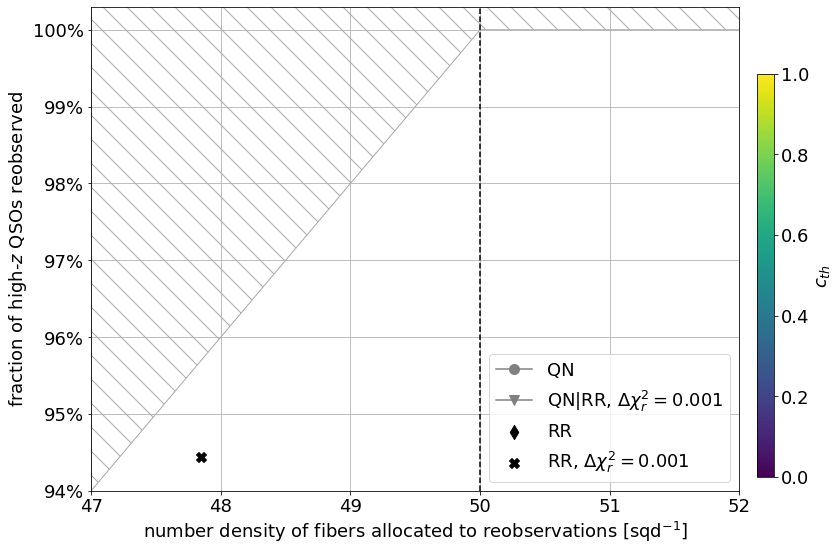

In [29]:
## Standard version of plot. This uses:
# - random exposures
# - andmask in redrock
# - a delta-reduced-chi2 threshold of 0.001 in redrock

drc2_th = 0.001
plot_strategies = ['QN randexp','RRngp andmask randexp','RRngp-a-r-drc2th {}'.format(drc2_th),'QN|RRngp-a-r-drc2th {}'.format(drc2_th)]
names = {'QN randexp': 'QN', 'RRngp andmask randexp': 'RR', 
         'RRngp-a-r-drc2th {}'.format(drc2_th): r'RR, $\Delta\chi_r^2={}$'.format(drc2_th), 
         'QN|RRngp-a-r-drc2th {}'.format(drc2_th): 'QN|RR, $\Delta\chi_r^2={}$'.format(drc2_th)}

filename = None #'../plots/classifier_performance_selecting_for_reobservation_randexp.pdf'
xmin,xmax = (47,52)
ymin = 0.94

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,
                                    figsize=figsize,nydec=0)
plt.show()

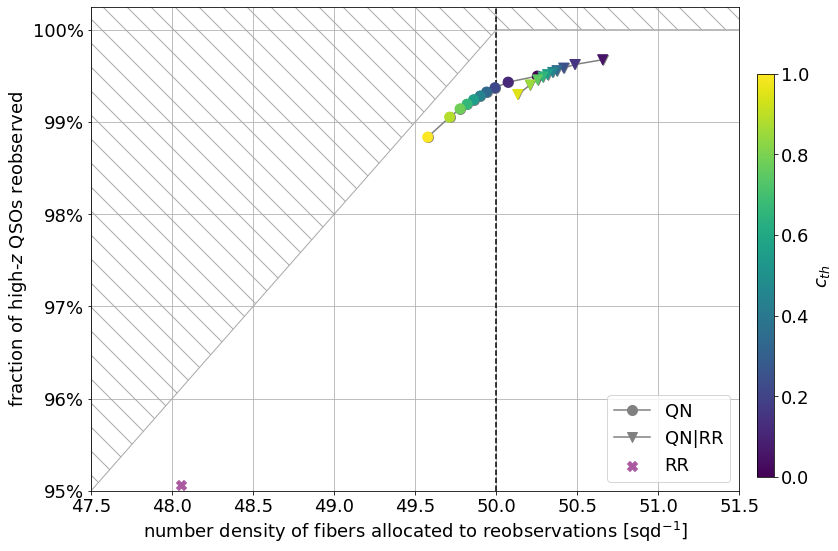

In [16]:
## Standard version of plot. This uses:
# - best exposures
# - andmask in redrock
# - a delta-reduced-chi2 threshold of 0.001 in redrock

drc2_th = 0.001
plot_strategies = ['QN bestexp','RRngp-a-b-drc2th {}'.format(drc2_th),'QN|RRngp-a-b-drc2th {}'.format(drc2_th)]
names = {'QN bestexp': 'QN', 'RRngp-a-b-drc2th {}'.format(drc2_th): 'RR', 'QN|RRngp-a-b-drc2th {}'.format(drc2_th): 'QN|RR'}
filename = '../plots/classifier_performance_selecting_for_reobservation_bestexp.pdf'
xmin,xmax = (47.5,51.5)
ymin = 0.95

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,
                                    figsize=figsize,nydec=0)
plt.show()

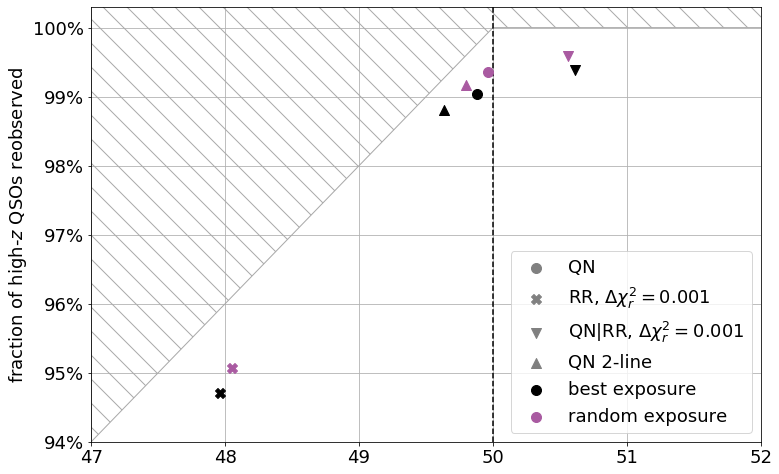

In [17]:
## Alternative version of plot. This uses:
# - both random and best exposures
# - c_th=0.3 in QuasarNET
# - andmask in redrock
# - a delta-reduced-chi2 threshold of 0.001 in redrock

drc2_th = 0.001
plot_strategies = ['QN randexp 1point','RRngp-a-r-drc2th {}'.format(drc2_th),'QN|RRngp-a-r-drc2th {} 1point'.format(drc2_th),'QN2line randexp 1point',
                   'QN bestexp 1point','RRngp-a-b-drc2th {}'.format(drc2_th),'QN|RRngp-a-b-drc2th {} 1point'.format(drc2_th),'QN2line bestexp 1point',
                  ]
names = {'QN randexp 1point': 'QN', 'RRngp-a-r-drc2th {}'.format(drc2_th): 'RR', 'QN|RRngp-a-r-drc2th {} 1point'.format(drc2_th): 'QN|RR', 'QN2line randexp 1point': 'QN 2-line',
         'QN bestexp 1point': 'QN*', 'RRngp-a-b-drc2th {}'.format(drc2_th): 'RR*', 'QN|RRngp-a-b-drc2th {} 1point'.format(drc2_th): 'QN|RR*', 'QN2line bestexp 1point': 'QN 2-line*',
        }
filename = '../plots/classifier_performance_selecting_for_reobservation_alt.pdf'
xmin,xmax = (47,52)
ymin = 0.94

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,
                                    figsize=figsize,nydec=0,auto_legend=False)

artists = []
labels = []
legend_strats = ['QN randexp 1point','RRngp-a-r-drc2th {}'.format(drc2_th),'QN|RRngp-a-r-drc2th {} 1point'.format(drc2_th),'QN2line randexp 1point']
legend_stratnames = {'QN randexp 1point': 'QN', 'RRngp-a-r-drc2th {}'.format(drc2_th): r'RR, $\Delta\chi_r^2={}$'.format(drc2_th),
                     'QN|RRngp-a-r-drc2th {} 1point'.format(drc2_th): r'QN|RR, $\Delta\chi_r^2={}$'.format(drc2_th),
                     'QN2line randexp 1point': 'QN 2-line',}
for s in legend_strats:
    artists += [axs[0,0].scatter([],[],marker=stratdefs[s]['marker'],color='grey',s=100)]
    labels += [legend_stratnames[s]]
artists += [axs[0,0].scatter([],[],marker='o',color=stratdefs['QN randexp 1point']['color'],s=100)]
labels += ['best exposure']
artists += [axs[0,0].scatter([],[],marker='o',color=stratdefs['QN bestexp 1point']['color'],s=100)]
labels += ['random exposure']
plt.legend(artists,labels,loc=4)

plt.show()

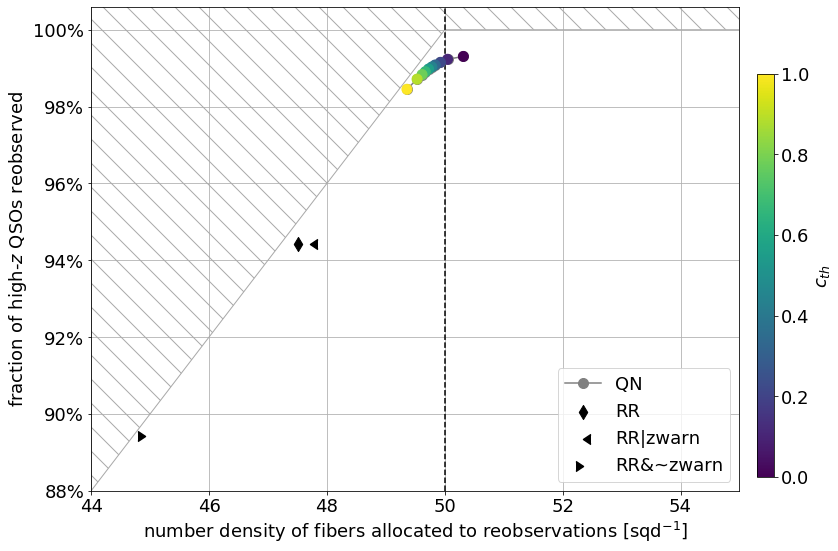

In [19]:
## Standard version of plot but with 3 RR points for including zwarn or not.
plot_strategies = ['QN randexp','RRngp andmask randexp','RRngp|zwarn andmask randexp','RRngp&~zwarn andmask randexp']
names = {'QN randexp': 'QN', 'RRngp andmask randexp': 'RR', 'RRngp|zwarn andmask randexp': 'RR|zwarn', 'RRngp&~zwarn andmask randexp': 'RR&~zwarn'}
filename = '../plots/classifier_performance_selecting_for_reobservation_zwarn.pdf'
xmin,xmax = (44,55)
ymin = 0.88

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,
                                    figsize=figsize,nydec=0)
plt.show()

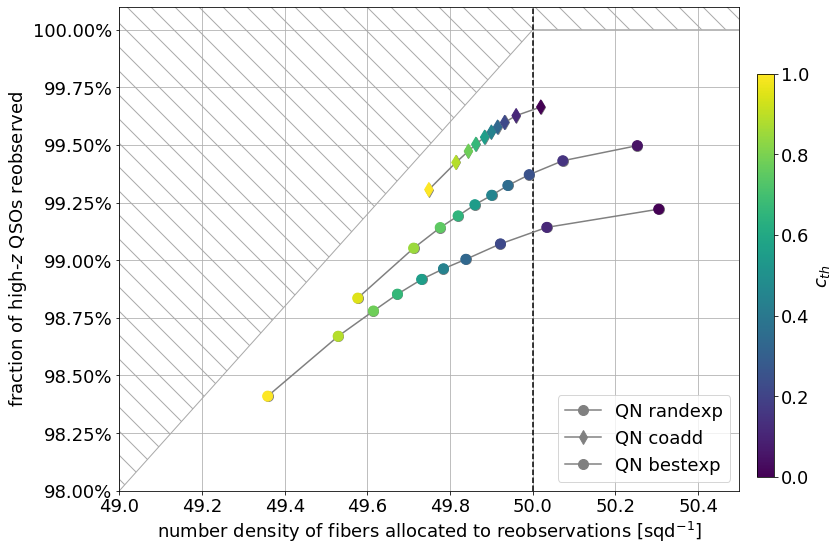

In [18]:
## Extra QN strategies version of plot
plot_strategies = ['QN randexp','QN coadd','QN bestexp']
names = {'QN randexp': 'QN randexp', 'QN coadd': 'QN coadd', 'QN bestexp': 'QN bestexp'}
filename = '../plots/classifier_performance_selecting_for_reobservation_qntest.pdf'
xmin,xmax = (49,50.5)
ymin = 0.98

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,
                                    figsize=figsize,nydec=2)
plt.show()

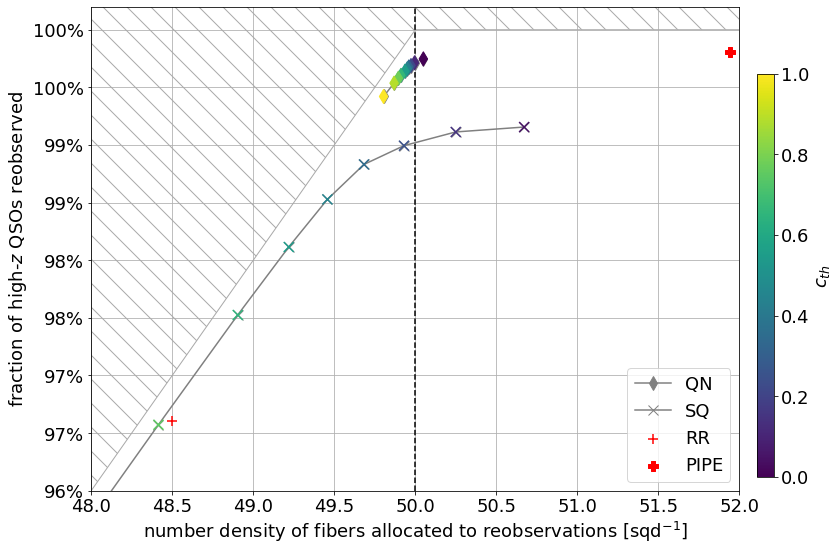

In [21]:
## Coadd only version of plot
plot_strategies = ['QN coadd','RR coadd','PIPE','SQ coadd']
names = {'QN coadd': 'QN', 'RR coadd': 'RR', 'PIPE': 'PIPE', 'SQ coadd': 'SQ'}
filename = '../plots/classifier_performance_selecting_for_reobservation_coadd.pdf'
xmin,xmax = (48,52)
ymin = 0.96

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,
                                    figsize=figsize,nydec=0)
plt.show()

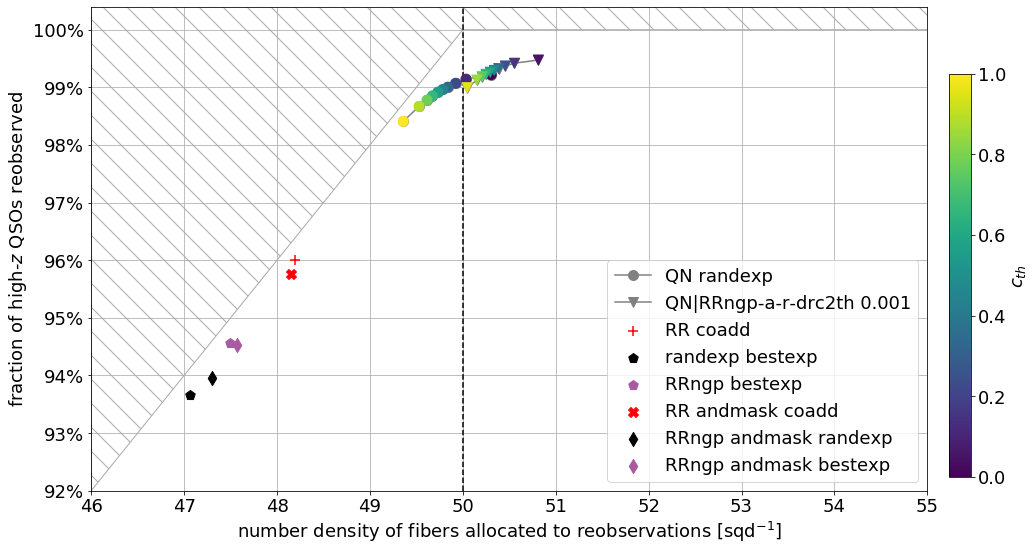

In [20]:
## Compare redrock version of plot
drc2_th = 0.001
plot_strategies = ['QN randexp','RR coadd','RRngp randexp','RRngp bestexp',
                   #'RRold','RRngp coadd','RRngp andmask coadd',
                   'RR andmask coadd','RRngp andmask randexp','RRngp andmask bestexp',
                   #'RRngp archetypes randexp', 'RRngp archetypes randexp &~zwarn','QN|RRngp archetypes randexp', 'RRngp archetypes andmask randexp', 
                   'QN|RRngp-a-r-drc2th {}'.format(drc2_th),
                  ]

names = {'QN randexp': 'QN randexp', 'RRold': 'RR coadd old', 
         'RR coadd': 'RR coadd', 'RRngp coadd': 'RRngp coadd', 'RRngp randexp': 'randexp bestexp', 'RRngp bestexp': 'RRngp bestexp',
         'RR andmask coadd': 'RR andmask coadd', 'RRngp andmask coadd': 'RRngp andmask coadd', 
         'RRngp andmask randexp': 'RRngp andmask randexp', 'RRngp andmask bestexp': 'RRngp andmask bestexp',
         'RRngp archetypes randexp': 'RRngp archetypes randexp', 'RRngp archetypes randexp &~zwarn': 'RRngp archetypes randexp &~zwarn',
         'RRngp archetypes andmask randexp': 'RRngp archetypes andmask randexp',
         'QN|RRngp archetypes randexp': 'QN|RRngp archetypes randexp',
         'QN|RRngp-a-r-drc2th {}'.format(drc2_th): 'QN|RRngp-a-r-drc2th {}'.format(drc2_th),
        }

filename = '../plots/classifier_performance_selecting_for_reobservation_rrtest.pdf'
xmin,xmax = (46,55)
ymin = 0.92

# Define the strategies.
strategies = {names[s]: stratdefs[s] for s in plot_strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,
                                    figsize=(15,8),nydec=0)
plt.show()

In [ ]:
## OLD TESTS

"""## Load the old QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_olddat/qnAll-train_0.1_randexp_olddat_noamsgrad-test_randexp_olddat.fits'
data['QNoldtraindat_oldtestdat_noamsgrad'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the old QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_olddat/qnAll-train_0.1_randexp_olddat-test_randexp_olddat.fits'
data['QNoldtraindat_oldtestdat'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the old QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_olddat/qnAll-train_0.1_randexp_olddat-test_randexp_newdat.fits'
data['QNoldtraindat_newtestdat'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the old QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_olddat/qnAll-train_0.1_randexp_newdat-test_randexp_olddat.fits'
data['QNnewtraindat_oldtestdat'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the old QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_olddat/qnAll-train_0.1_randexp_newdat-test_randexp_newdat.fits'
data['QNnewtraindat_newtestdat'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)"""


"""# QNoldtraindat_oldtestdat_noamsgrad definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QNoldtraindat_oldtestdat_noamsgrad'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QNoldtraindat_oldtestdat_noamsgrad'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': 's'}

# QNoldtraindat_oldtestdat definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QNoldtraindat_oldtestdat'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QNoldtraindat_oldtestdat'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': 'p'}

# QNoldtraindat_newtestdat definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QNoldtraindat_newtestdat'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QNoldtraindat_newtestdat'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': 'd'}

# QNnewtraindat_oldtestdat definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QNnewtraindat_oldtestdat'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QNnewtraindat_oldtestdat'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': '^'}

# QNnewtraindat_newtestdat definitions.
n_detect = 1
strat = strategy.Strategy('qn',cf_kwargs={'qn_name':'QNnewtraindat_newtestdat'})
preds = [strat.predict(data_table,c_kwargs={'c_th':c_th_value,'n_detect':n_detect}) for c_th_value in c_th_values]
stratdefs['QNnewtraindat_newtestdat'] = {'w': [pred.get_ishighzqso(zcut=zcut) for pred in preds],
                   'color': c_th_values, 'marker': 'v'}"""


"""## Standard version of plot
#plot_strategies = ['QN','QNold','QNnewtraindat_newtestdat','QNoldtraindat_newtestdat','QNoldtraindat_oldtestdat','QNnewtraindat_oldtestdat']
plot_strategies = ['QN','QNold','QNoldtraindat_oldtestdat','QNoldtraindat_oldtestdat_noamsgrad']
filename = '../plots/classifier_performance_selecting_for_reobservation_current.pdf'
xmin,xmax = (49,51)
ymin = 0.97

# Define the strategies.
strategies = {s: stratdefs[s] for s in plot_strategies}

# Make the plot.
fig, axs = plot.plot_reobservation_performance(data_table,strategies,filename=filename,
                                    dv_max=dv_max,zcut=zcut,ymin=ymin,xmin=xmin,xmax=xmax,
                                    verbose=False,n_highz_desi=n_highz_desi,
                                    figsize=figsize,nydec=1)
plt.show()"""